In [11]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [12]:
import numpy as np
import pandas as pd

In [13]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [14]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [17]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [18]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [19]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [20]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [21]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [48]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
for row in session.query(Measurement.date, Measurement.prcp).limit(347).all():
    print(row)
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores
for row in session.query(Measurement.prcp, Dow.volume).limit(15).all():
    print(row)
# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


('2010-01-01', 0.08)
('2010-01-02', 0.0)
('2010-01-03', 0.0)
('2010-01-04', 0.0)
('2010-01-06', None)
('2010-01-07', 0.06)
('2010-01-08', 0.0)
('2010-01-09', 0.0)
('2010-01-10', 0.0)
('2010-01-11', 0.01)
('2010-01-12', 0.0)
('2010-01-14', 0.0)
('2010-01-15', 0.0)
('2010-01-16', 0.0)
('2010-01-17', 0.0)
('2010-01-18', 0.0)
('2010-01-19', 0.0)
('2010-01-20', 0.0)
('2010-01-21', 0.0)
('2010-01-22', 0.0)
('2010-01-23', 0.0)
('2010-01-24', 0.01)
('2010-01-25', 0.0)
('2010-01-26', 0.04)
('2010-01-27', 0.12)
('2010-01-28', 0.0)
('2010-01-30', None)
('2010-01-31', 0.03)
('2010-02-01', 0.01)
('2010-02-03', None)
('2010-02-04', 0.01)
('2010-02-05', 0.0)
('2010-02-06', 0.0)
('2010-02-07', 0.0)
('2010-02-08', 0.0)
('2010-02-09', 0.0)
('2010-02-11', 0.0)
('2010-02-12', 0.02)
('2010-02-13', 0.01)
('2010-02-14', 0.0)
('2010-02-15', 0.0)
('2010-02-16', 0.0)
('2010-02-17', 0.0)
('2010-02-19', None)
('2010-02-20', 0.03)
('2010-02-21', 0.0)
('2010-02-22', 0.0)
('2010-02-23', 0.0)
('2010-02-24', 0.0)
('20

NameError: name 'Dow' is not defined

In [44]:
most_recent = session.query(func.max(Measurement.date)).first()
most_recent

('2017-08-23')

In [46]:
previous_year = dt.date(2017,8,23)-dt.timedelta(days=365)
previous_year

datetime.date(2016, 8, 23)

In [47]:
last_year = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=previous_year).all()
ly_df = pd.DataFrame(last_year,columns=['date','precipitation'])
ly_df.sort_values("date",inplace = True)
ly_df

,date,precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


Text(0.5, 1.0, 'Previous Year Precipitation in Hawaii')

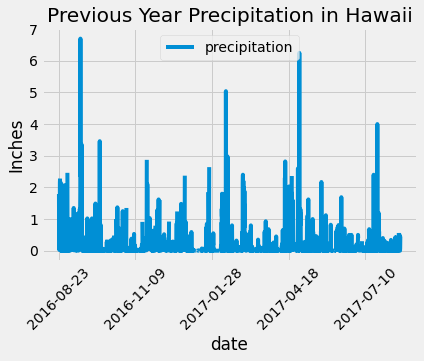

In [52]:
ly_df.plot(x="date",y="precipitation",rot=45)
plt.ylabel("Inches")
plt.title("Previous Year Precipitation in Hawaii")

In [54]:
# Use Pandas to calcualte the summary statistics for the precipitation data
ly_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [56]:
# Design a query to show how many stations are available in this dataset?
station = session.query(func.count(Station.station)).all()
station

[(9)]

In [57]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [58]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
highest = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station=="USC00519281").all()
highest

[(54.0, 85.0, 71.66378066378067)]

In [59]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
highest_temp = session.query(Measurement.tobs).filter(Measurement.station == "USC00519281").filter(Measurement.date >= previous_year).all()
h_t = pd.DataFrame(highest_temp,columns = ['tobs'])
h_t

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


Text(0.5, 1.0, 'All Temp For Most Active Station From Previous Year')

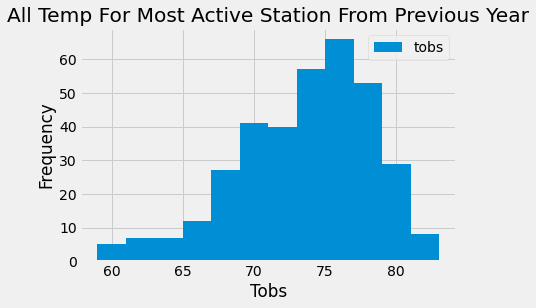

In [62]:
h_t.plot.hist(bins = 12)
plt.xlabel("Tobs")
plt.title("All Temp For Most Active Station From Previous Year")

## Bonus Challenge Assignment

In [63]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [64]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
lowest, avg, most = calc_temps("2016-08-23","2017-08-23")[0]
print (lowest, avg, most)

58.0 74.59058295964125 87.0


<ipython-input-67-12418fc3b581>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


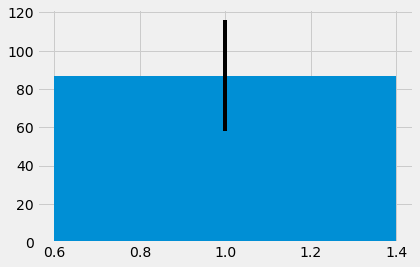

In [67]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax=plt.subplots()
yerr = most-lowest 
bar = ax.bar(1,most,yerr=yerr,align="center")
#ax.set(xticks=range())
fig.show()

In [70]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rainfall = session.query(Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation,func.sum(Measurement.prcp)).\
                         filter(Measurement.station==Station.station).filter(Measurement.date >= "2016-08-23").filter(Measurement.date <= "2017-08-23").\
                         group_by(Station.name).order_by(func.sum(Measurement.prcp).desc()).all()
rainfall
    


[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  147.81000000000006),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  70.03000000000003),
 ('USC00513117',
  'KANEOHE 838.1, HI US',
  21.4234,
  -157.8015,
  14.6,
  48.510000000000026),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  38.01),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  33.239999999999995),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  16.089999999999986),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 4.59)]

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`


In [3]:
#Step 2 - Climate App

In [4]:
from flask import Flask, jsonify

In [ ]:
app = Flask(_name_)

In [ ]:
@app.route("/")
def welcome():
    return(
    f"/api/v1.0/precipitation"
    f"/api/v1.0/stations"
    f"/api/v1.0/tobs"
    f"/api/v1.0/<start>""
    f"/api/v1.0/<start>/<end>"
    )

In [ ]:
@app.route("/api/v1.0/precipitation")
def precipitation():
    results = session.query(Measurement.date,Measurement.prcp).all()
 all_precipitation = []
    for date, prcp in results:
        precipitation_dict = {}
        precipitation_dict["date"] = date
        precipitation_dict["prcp"] = prcp
        all_precipitation.append(precipitation_dict)

    return jsonify(all_precipitation)

In [ ]:
@app.route("/api/v1.0/stations")
def stations():
    station_list = session.query(func.count(Station.station)).all()
    
    return jsonify(station_list)

In [ ]:
@app.route("/api/v1.0/tobs")
def tobs():
    tob_templist = session.query(Measurement.tobs).filter(Measurement.station == "USC00519281").filter(Measurement.date >= previous_year).all()
return jsonify(tob_templist)    

In [ ]:
@app.route("/api/v1.0/<start>")
def start():
    

In [ ]:
@app.route("/api/v1.0/<start>/<end>")
def end():